In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv("../data/dataset.csv")

In [31]:
BASE = 10
ALPHA = 0.8     # occupancy sensitivity
K = 0.2         # smoothing toward target (0< K ≤1)
P_MIN, P_MAX = 5, 20

In [32]:
def model1_price(lot_df, base=BASE, alpha=ALPHA, k=K):
    df = lot_df.copy()
    df["OccRate"] = df["Occupancy"] / df["Capacity"]
    # time-sorted
    df = df.sort_values("DateTime")
    prices = []
    P = base
    for occ in df["OccRate"].values:
        target = base * (1 + alpha * occ)           # direct mapping (no accumulation)
        P = P + k * (target - P)                    # smooth toward target
        P = max(P_MIN, min(P_MAX, P))               # bounds
        prices.append(P)
    df["Model1Price"] = prices
    return df

In [33]:
lot_id = "BHMBCCMKT01"
lot_data = df[df['SystemCodeNumber'] == lot_id].copy()

In [36]:
lot_data['DateTime'] = pd.to_datetime(
    lot_data['LastUpdatedDate'] + " " + lot_data['LastUpdatedTime'],
    format="%d-%m-%Y %H:%M:%S"
)
lot_data = lot_data.sort_values('DateTime')

lot_data = model1_price(lot_data)

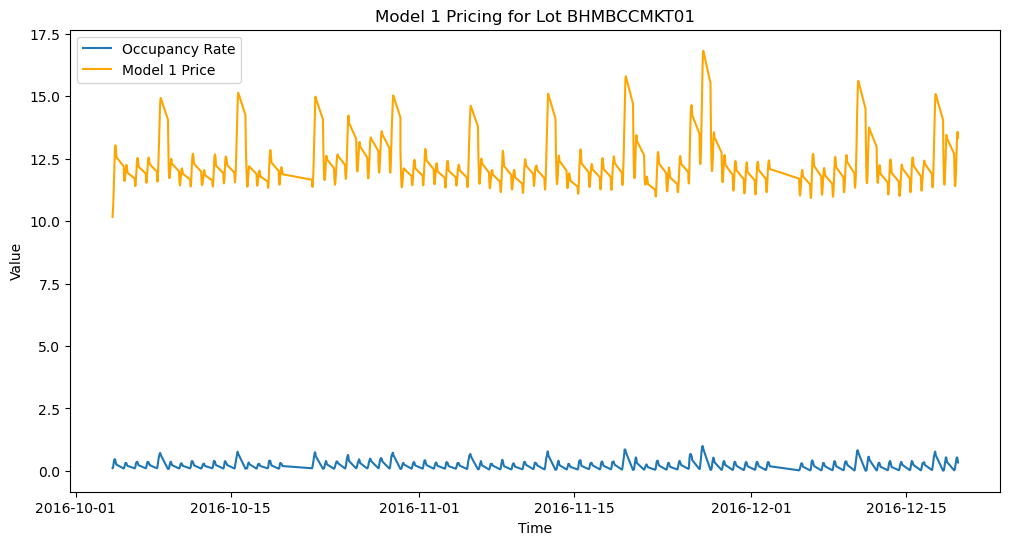

In [37]:
# Plot occupancy vs price
plt.figure(figsize=(12,6))
plt.plot(lot_data['DateTime'], lot_data['Occupancy']/lot_data['Capacity'], label="Occupancy Rate")
plt.plot(lot_data['DateTime'], lot_data['Model1Price'], label="Model 1 Price", color="orange")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title(f"Model 1 Pricing for Lot {lot_id}")
plt.legend()
plt.show()

In [38]:
import matplotlib.pyplot as plt
import os

In [39]:
os.makedirs("model1_plots", exist_ok=True)

In [40]:
lots = df['SystemCodeNumber'].unique()

In [44]:
for lot_id in lots:
    lot_data = df[df['SystemCodeNumber'] == lot_id].copy()
    lot_data['DateTime'] = pd.to_datetime(
        lot_data['LastUpdatedDate'] + " " + lot_data['LastUpdatedTime'],
        format="%d-%m-%Y %H:%M:%S"
    )
    lot_data = lot_data.sort_values('DateTime')

    lot_data = model1_price(lot_data)

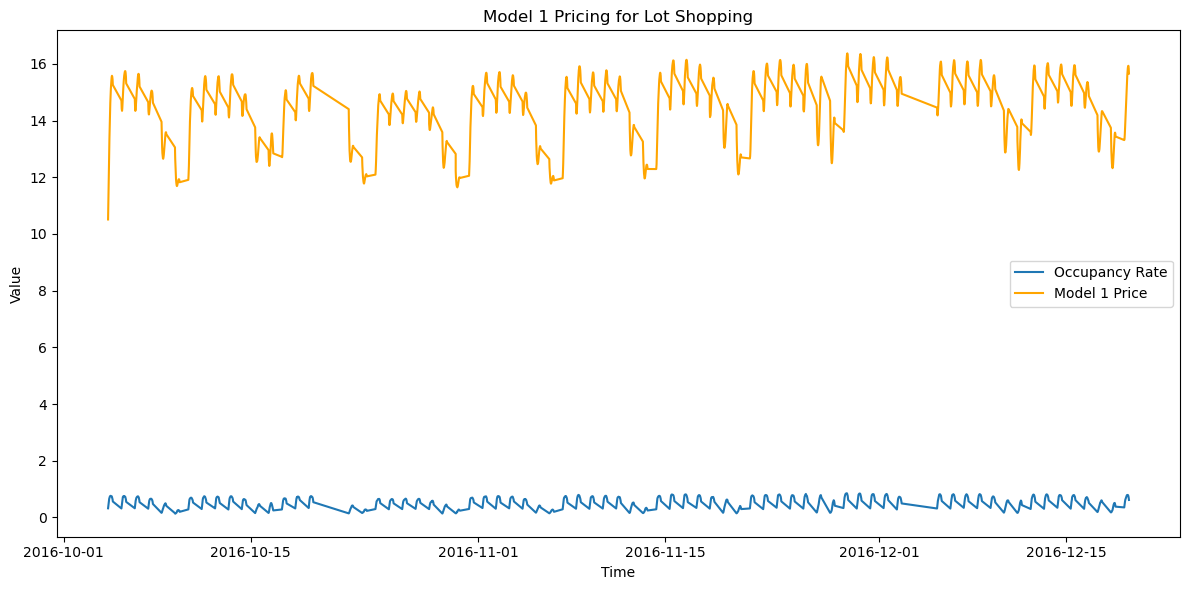

In [45]:
plt.figure(figsize=(12,6))
plt.plot(lot_data['DateTime'], lot_data['OccRate'], label="Occupancy Rate")
plt.plot(lot_data['DateTime'], lot_data['Model1Price'], label="Model 1 Price", color="orange")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title(f"Model 1 Pricing for Lot {lot_id}")
plt.legend()
plt.tight_layout()

In [46]:
plt.savefig(f"model1_plots/{lot_id}_model1.png")
plt.close()